##                                             Project - Supervised Learning 

<center>
<span style="font-family: Arial; font-weight:bold;font-size:1.9em;color:#0e92ea"> <h3> Personal Loan Analytics
</center>

###### Objective:
The classification goal is to predict the likelihood of a liability customer buying personal loans.
This case is about a bank (Thera Bank) whose management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors)

###### Exploratory Data Analysis
    - Univariate Analysis - Outlier and Frequency Analysis
    - Bivariate Analysis - Visualization
    - Variable Reduction - Multicollinearity

###### Data Pre-Processing - 
    - Missing Values Treatment - Numerical (Mean/Median imputation) and Categorical (Separate Missing Category or Merging)
    - Outlier Treatment
    - Skewness reduction of variable
    - Standardising the Numerical columns
    
###### Model Build and Model Diagnostics
    - Train and Test split
    - Significance of each Variable
    - Gini and ROC / Concordance analysis - Rank Ordering
    - Classification Table Analysis - Accuracy

###### Model Validation
    - ROC Curve - p-value and sign testing for the model coefficients
    - Diagnostics check to remain similar to Training Model build
    - BootStrapping, if necessary
###### Choose the best model
    - Draw an ROC_AUC curve of all the models and choose which performs better.

### Import necessary packages

In [1]:
#importing the libraries that we use
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
sns.set(color_codes=True) # adds a nice background to the graphs
%matplotlib inline

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


##### Read bank customer data

In [2]:
cust_df = pd.read_csv("Bank_Personal_Loan_Modelling.csv")

In [3]:
cust_df.head(10).style.background_gradient(cmap="RdYlBu")

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.600000,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.500000,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.000000,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.700000,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.000000,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.400000,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.500000,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.300000,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0.600000,2,104,0,0,0,1,0
9,10,34,9,180,93023,1,8.900000,3,0,1,0,0,0,0


<span style="font-family: Arial; font-weight:bold;font-size:2.5em;color:#0e92ea"> Exploratory Data Analysis

In [4]:
cust_df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [5]:
cust_df.info()  #Shape of the DataSet

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


There are 14 features available in the provided Dataset

#### Attribute Information:
- ID :  Customer ID
- Age :  Customer's age in completed years
- Experience :  #years of professional experience
- Income :  Annual income of the customer
- ZIP Code :  Home Address ZIP code.
- Family :  Family size of the customer
- CCAvg :  Avg. spending on credit cards per month
- Education : Education Level.
            1. Undergrad
            2. Graduate
            3. Advanced/Professional
- Mortgage :  Value of house mortgage if any.
- Personal Loan : Did this customer accept the personal loan offered in the last campaign?
- Securities Account : Does the customer have a securities account with the bank?
- CD Account : Does the customer have a certificate of deposit (CD) account with the bank?
- Online : Does the customer use internet banking facilities?
- Credit card : Does the customer use a credit card issued by Thera Bank?

In [6]:
cust_df[["Age","Experience","Income","CCAvg","Mortgage"]] = cust_df[["Age","Experience","Income","CCAvg","Mortgage"]].astype(float)

In [7]:
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   float64
 2   Experience          5000 non-null   float64
 3   Income              5000 non-null   float64
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   float64
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(5), int64(9)
memory usage: 547.0 KB


<span style="font-family: Arial; font-weight:bold;font-size:1.9em;color:#0e92ea">Univariate Analysis

In [8]:
cust_df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


### Lets Segregate Categorical  and Continuous feature

In [9]:
cust_cat = cust_df.loc[:,["Family","Education","Personal Loan","Securities Account","CD Account","Online","CreditCard"]]
cust_num = cust_df.loc[:,["ID","Age","Experience","Income","ZIP Code","CCAvg","Mortgage"]]

In [10]:
cust_cat.head()

,Family,Education,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,4,1,0,1,0,0,0
1,3,1,0,1,0,0,0
2,1,1,0,0,0,0,0
3,1,2,0,0,0,0,0
4,4,2,0,0,0,0,1


In [11]:
cust_num.head()

,ID,Age,Experience,Income,ZIP Code,CCAvg,Mortgage
0,1,25.0,1.0,49.0,91107,1.6,0.0
1,2,45.0,19.0,34.0,90089,1.5,0.0
2,3,39.0,15.0,11.0,94720,1.0,0.0
3,4,35.0,9.0,100.0,94112,2.7,0.0
4,5,35.0,8.0,45.0,91330,1.0,0.0


In [12]:
cust_num["Mortgage"].value_counts()

0.0      3462
98.0       17
89.0       16
103.0      16
91.0       16
         ... 
381.0       1
331.0       1
343.0       1
191.0       1
353.0       1
Name: Mortgage, Length: 347, dtype: int64

- Most of the elements ie., more than 50% are 0. Hence it is very sparse column

#### Skewness

In [13]:
cust_df.skew() #skewness of the data

ID                     0.000000
Age                   -0.029341
Experience            -0.026325
Income                 0.841339
ZIP Code             -12.500221
Family                 0.155221
CCAvg                  1.598443
Education              0.227093
Mortgage               2.104002
Personal Loan          2.743607
Securities Account     2.588268
CD Account             3.691714
Online                -0.394785
CreditCard             0.904589
dtype: float64

### As per the problem statement the target Variable/Dependent Variable is Personal Loan Column

In [14]:
Target = cust_df["Personal Loan"]

##### Lets study each column distribution

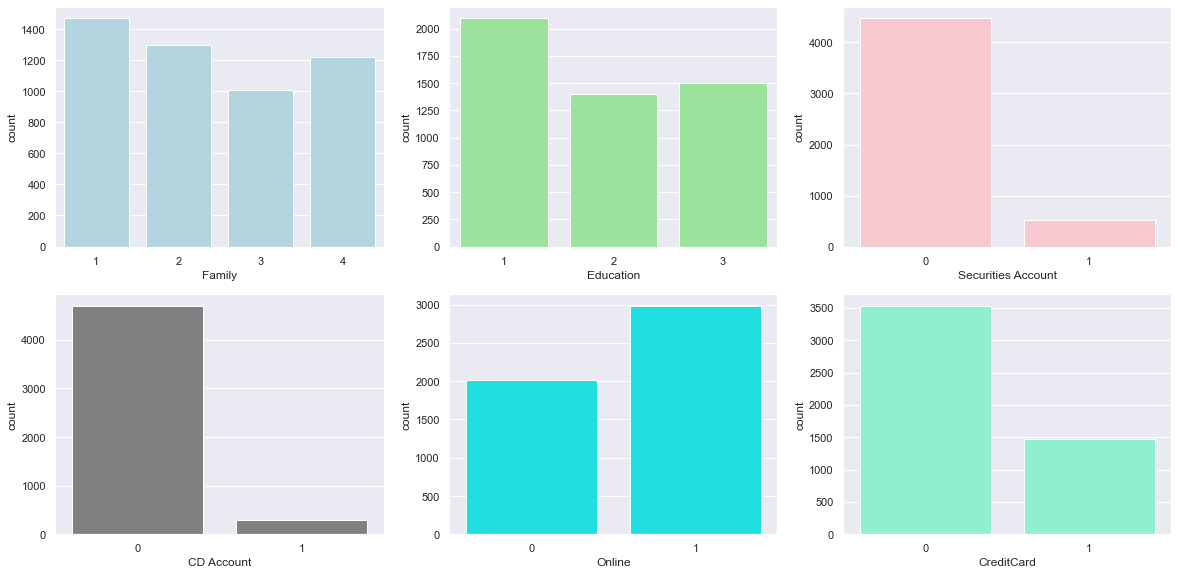

In [15]:
#Plots to see the distribution of the Categorical features individually

plt.figure(figsize= (20,15))
plt.subplot(3,3,1)
sns.countplot(cust_df["Family"], color='lightblue')
plt.xlabel('Family')

plt.subplot(3,3,2)
sns.countplot(cust_df["Education"], color='lightgreen')
plt.xlabel('Education')

plt.subplot(3,3,3)
sns.countplot(cust_df["Securities Account"], color='pink')
plt.xlabel('Securities Account')

plt.subplot(3,3,4)
sns.countplot(cust_df["CD Account"], color='gray')
plt.xlabel('CD Account')

plt.subplot(3,3,5)
sns.countplot(cust_df["Online"], color='cyan')
plt.xlabel('Online')

plt.subplot(3,3,6)
sns.countplot(cust_df["CreditCard"], color='Aquamarine')
plt.xlabel('CreditCard')

plt.show()

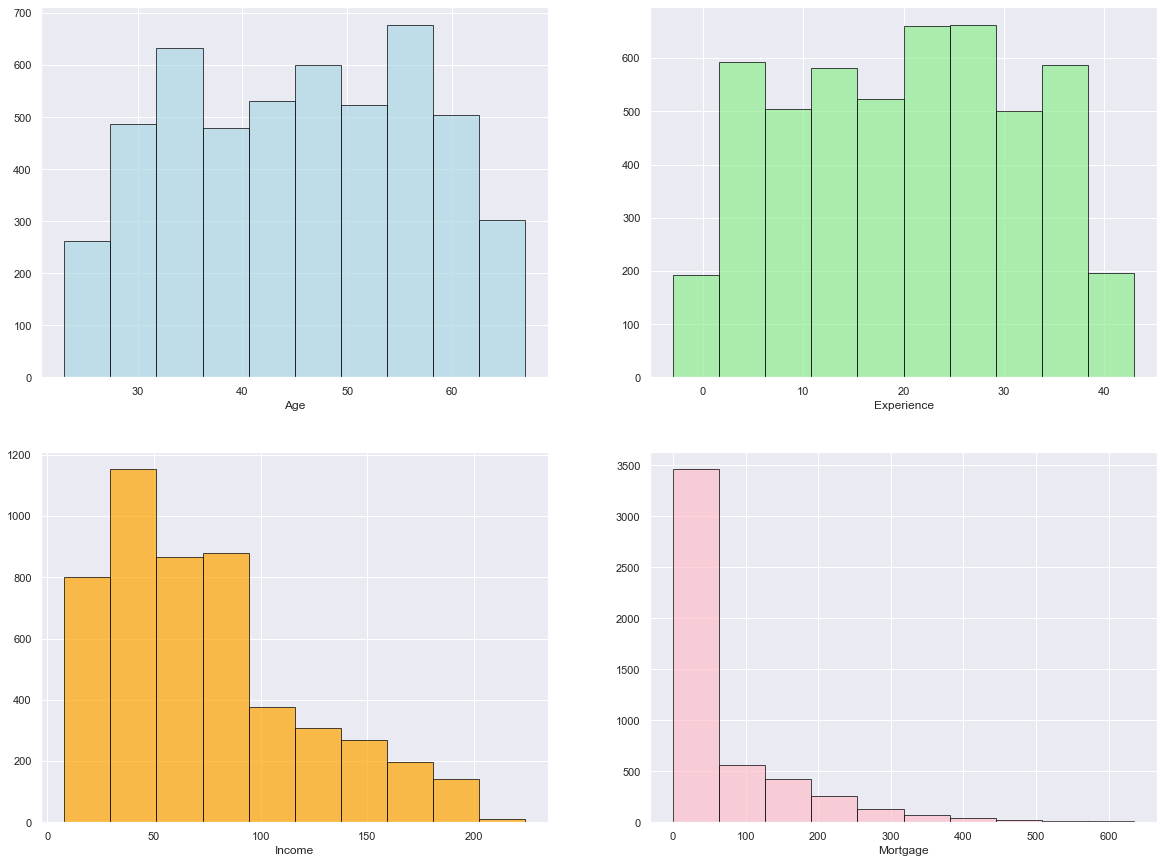

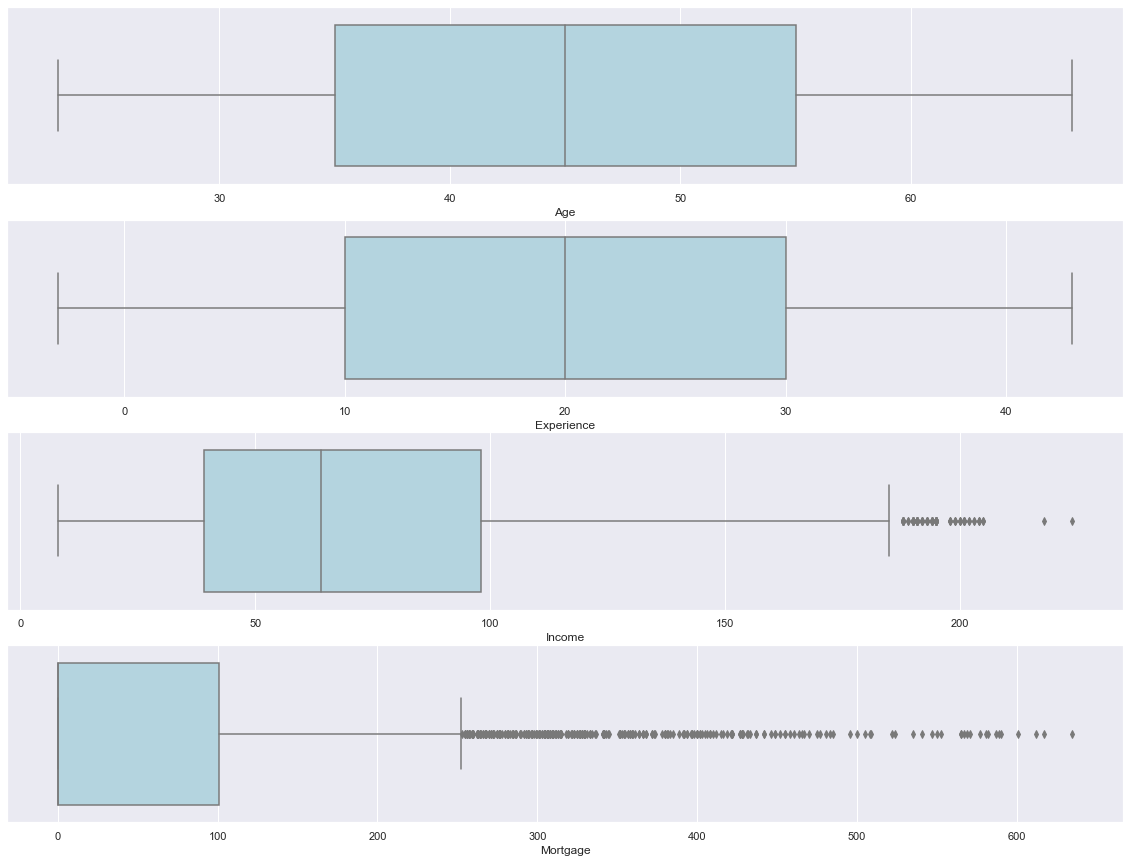

In [16]:
#Plots to see the distribution of the Continuos features individually
plt.figure(figsize= (20,15))
plt.subplot(2,2,1)
plt.hist(cust_df["Age"], color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('Age')

plt.subplot(2,2,2)
plt.hist(cust_df["Experience"], color='lightgreen', edgecolor = 'black', alpha = 0.7)
plt.xlabel('Experience')

plt.subplot(2,2,3)
plt.hist(cust_df["Income"], color='orange', edgecolor = 'black', alpha = 0.7)
plt.xlabel('Income')

plt.subplot(2,2,4)
plt.hist(cust_df["Mortgage"], color='Pink', edgecolor = 'black', alpha = 0.7)
plt.xlabel('Mortgage')

plt.figure(figsize= (20,15))
plt.subplot(4,1,1)
sns.boxplot(x= cust_df["Age"], color='lightblue')

plt.subplot(4,1,2)
sns.boxplot(x= cust_df["Experience"], color='lightblue')

plt.subplot(4,1,3)
sns.boxplot(x= cust_df["Income"], color='lightblue')

plt.subplot(4,1,4)
sns.boxplot(x= cust_df["Mortgage"], color='lightblue')

plt.show()

### Inferences from Univariate Analysis :
- Average age group of customers is 45yrs
- Average Experience of customers is 20
- Most of the customers are of age group 55
- There are no null values in the data
- 75% of the family members of the customer are 3
- 75% of the customers are using Online banking facility.
- Majority of the Customers are with experience between 20-30yrs
- Outliers are present in Mortage and Income feature
- Income and Mortage are right skewed 
- CCAVG , Mortgage, Personal Loan, Securities Account, CD Account are highly skewed
- Mortage is extremly positive skewed
- There are negative values in the Experience Columns which is impossible imputation is required on it.

<span style="font-family: Arial; font-weight:bold;font-size:1.9em;color:#0e92ea">Bivariate Analysis

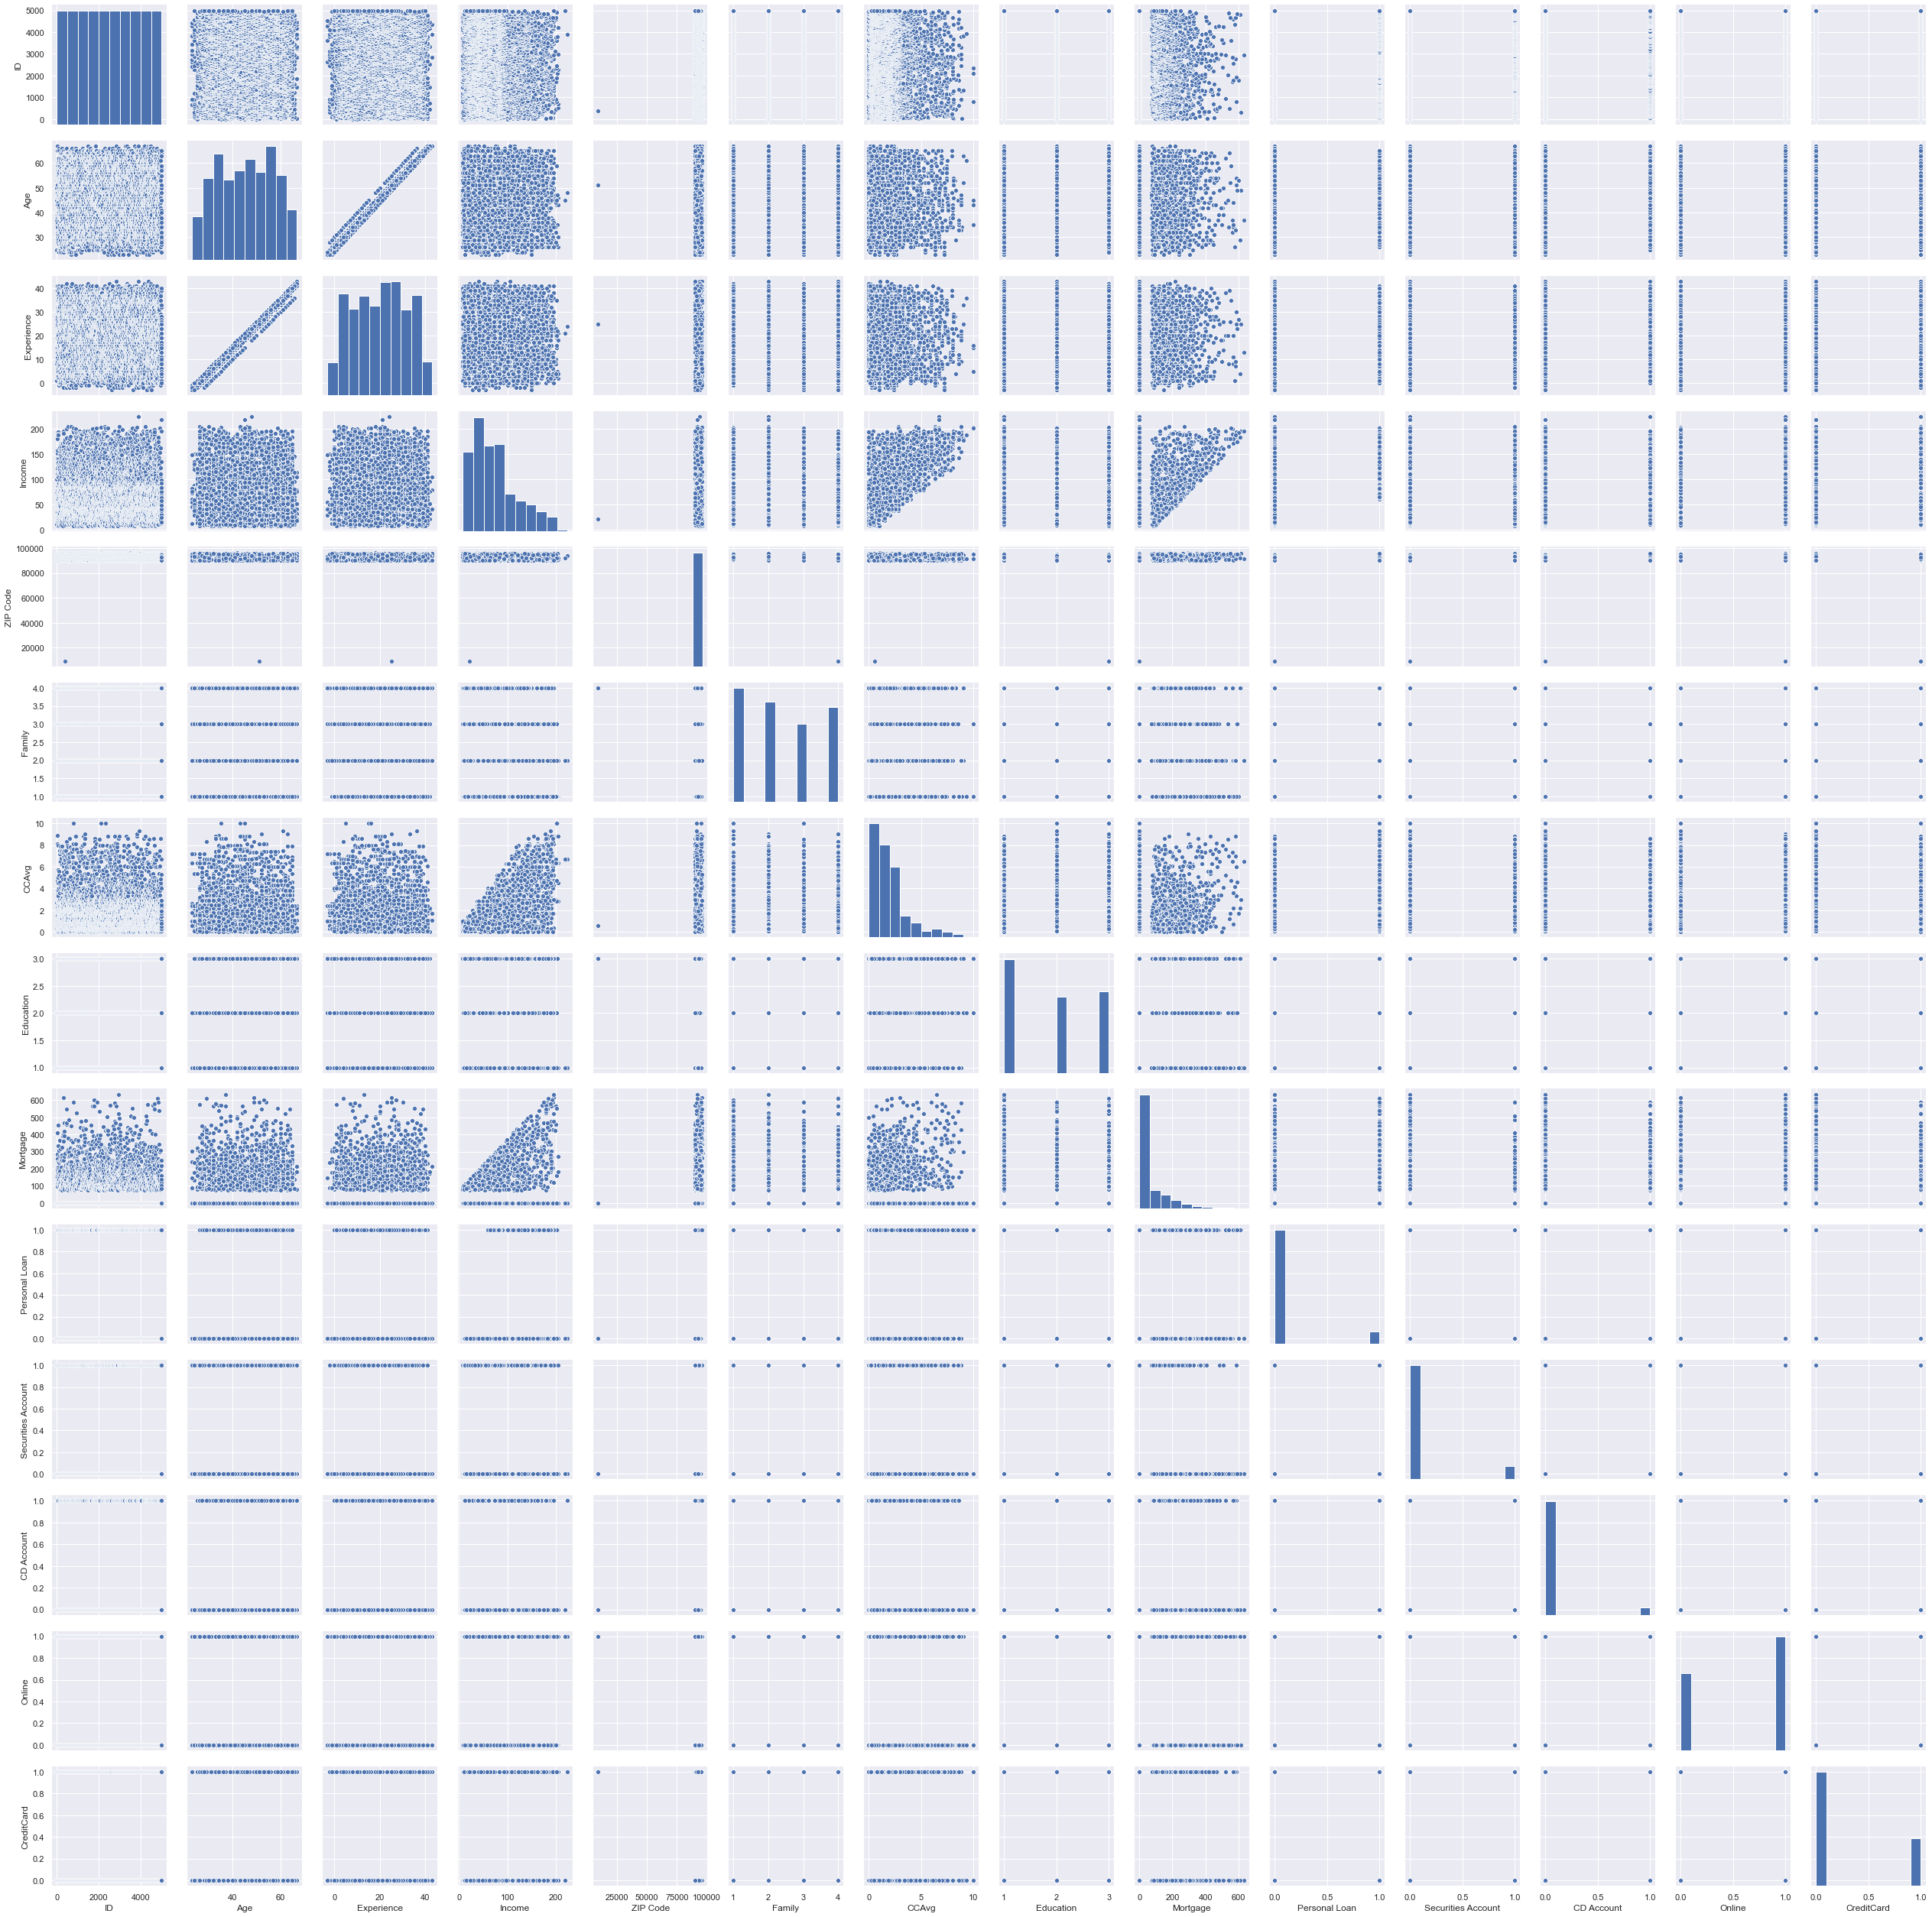

In [17]:
#Checking the pair plot between each feature
sns.pairplot(cust_df)  #pairplot
plt.show()

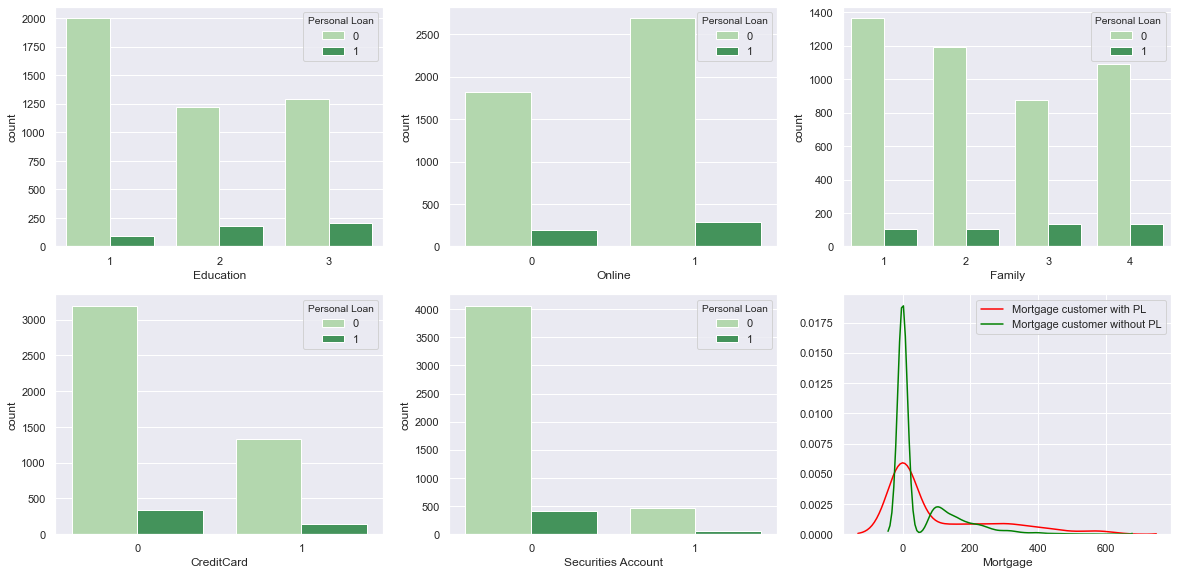

In [18]:
#Analysis between Target Variable and Other categorical variables.
plt.figure(figsize= (20,15))
plt.subplot(3,3,1)
sns.countplot(cust_df["Education"],palette="Greens",hue=cust_df["Personal Loan"])

plt.subplot(3,3,2)
sns.countplot(cust_df["Online"],palette="Greens",hue=cust_df["Personal Loan"])

plt.subplot(3,3,3)
sns.countplot(cust_df["Family"],palette="Greens",hue=cust_df["Personal Loan"])

plt.subplot(3,3,4)
sns.countplot(cust_df["CreditCard"],palette="Greens",hue=cust_df["Personal Loan"])

plt.subplot(3,3,5)
sns.countplot(cust_df["Securities Account"],palette="Greens",hue=cust_df["Personal Loan"])

plt.subplot(3,3,6)
sns.distplot(cust_df[cust_df["Personal Loan"]==1]["Mortgage"],kde=True,hist=False,color='red',label="Mortgage customer with PL")
sns.distplot(cust_df[cust_df["Personal Loan"]==0]["Mortgage"],hist=False,kde=True,color='green',label="Mortgage customer without PL")
plt.legend()
plt.show();

In [19]:
cust_df.corr()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,1.000000,-0.008473,-0.008326,-0.017695,0.013432,-0.016797,-0.024675,0.021463,-0.013920,-0.024801,-0.016972,-0.006909,-0.002528,0.017028
Age,-0.008473,1.000000,0.994215,-0.055269,-0.029216,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,-0.008326,0.994215,1.000000,-0.046574,-0.028626,-0.052563,-0.050077,0.013152,-0.010582,-0.007413,-0.001232,0.010353,0.013898,0.008967
Income,-0.017695,-0.055269,-0.046574,1.000000,-0.016410,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
ZIP Code,0.013432,-0.029216,-0.028626,-0.016410,1.000000,0.011778,-0.004061,-0.017377,0.007383,0.000107,0.004704,0.019972,0.016990,0.007691
Family,-0.016797,-0.046418,-0.052563,-0.157501,0.011778,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.024675,-0.052012,-0.050077,0.645984,-0.004061,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.021463,0.041334,0.013152,-0.187524,-0.017377,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.013920,-0.012539,-0.010582,0.206806,0.007383,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.024801,-0.007726,-0.007413,0.502462,0.000107,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802


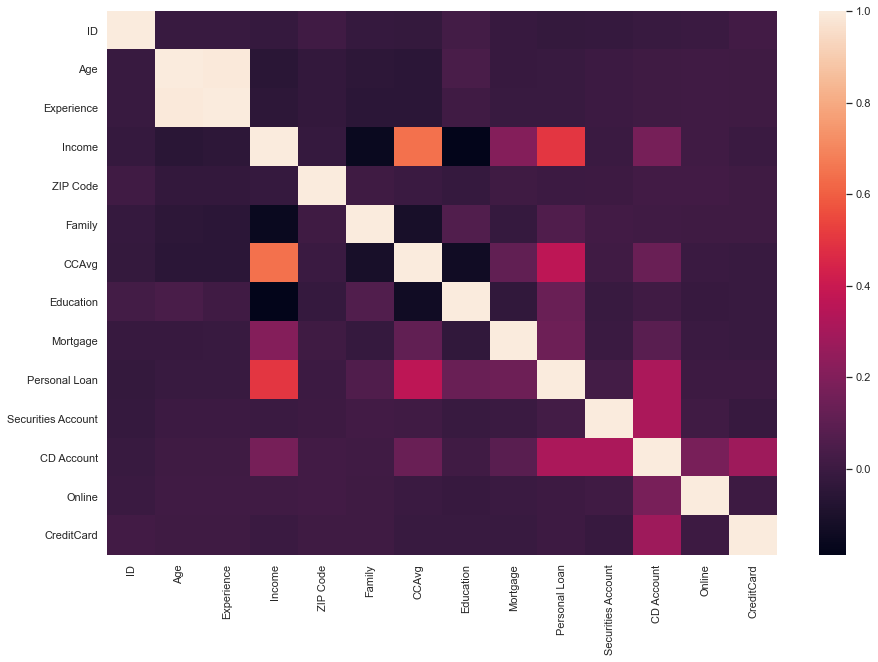

In [20]:
#Correlation
plt.figure(figsize= (15,10))
sns.heatmap(cust_df.corr())
plt.show()

### Inference from Bivariate Analysis

- The number of customers with higher education are buying Personal Loan compared to other groups.
- Customers who operates online are more tend to take loans compared to non online users.
- Family with size more than 2 are more intrested in personal loans
- Customers with no credit card are more intrested to buy personal loans
- Customers with no security accounts are more intrested in buying personal loans
- There is a higher correlation in Age and Experience feature so we can drop one of them.
- Correlation coefficient of ID and target variable Personal Loan is negative and close to zero so we can drop the variable.
- Correlation coefficient of Age and Experience are negative and close to zero so we can drop these variables as well.
- Correlation coefficient of Zip code variable is also close to zero so we can drop this variable .

### Target Column Distribution

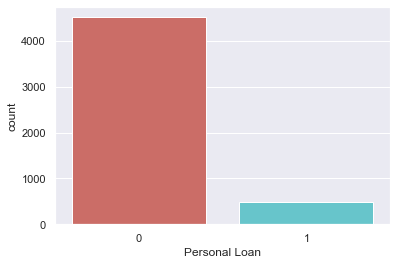

In [21]:
#count plot of 
sns.countplot(Target, palette='hls')
plt.show()

- The Data gathered is not even 
- Only few of the liability customers showed interest in buying personal loan.

In [22]:
n_true = len(cust_df.loc[cust_df["Personal Loan"] == 1])
n_false = len(cust_df.loc[cust_df["Personal Loan"] == 0])
print("Number of customers who bought personal loan: {0} ({1:2.2f}%)".format(n_true, (n_true / (n_true + n_false)) * 100 ))
print("Number of customers who didn't bought personal loan: {0} ({1:2.2f}%)".format(n_false, (n_false / (n_true + n_false)) * 100))

Number of customers who bought personal loan: 480 (9.60%)
Number of customers who didn't bought personal loan: 4520 (90.40%)


<span style="font-family: Arial; font-weight:bold;font-size:2.5em;color:#0e92ea">Data Pre Processing

In [23]:
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   float64
 2   Experience          5000 non-null   float64
 3   Income              5000 non-null   float64
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   float64
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(5), int64(9)
memory usage: 547.0 KB


- There are no missing values in the dataset
- There are outliers in income and mortage column as per the above univariate analysis

### Imputing Data

- There are negative values in Experience columns which is not possible so imputing the negative values with mean of the Experience

In [24]:
avg_Exp = cust_df["Experience"].mean()
print(f"Average Experience {avg_Exp}")
cust_df["Experience"] = cust_df["Experience"].apply(lambda x : avg_Exp if x<0 else x)

Average Experience 20.1046


### Outlier Treatment
###### IQR

In [25]:
Q1 = cust_df["Income"].quantile(0.25)
Q3 = cust_df["Income"].quantile(0.75)
IQR = Q3 - Q1
whisker = Q1 + 1.5 * IQR
cust_inc = cust_df["Income"].apply(lambda x : whisker if x>whisker else x)

In [26]:
Q1 = cust_df["Mortgage"].quantile(0.25)
Q3 = cust_df["Mortgage"].quantile(0.75)
IQR = Q3 - Q1
whisker = Q1 + 1.5 * IQR
cust_mor = cust_df["Mortgage"].apply(lambda x : whisker if x>whisker else x)

In [27]:
cust_df["Income"]=cust_inc
cust_df["Mortgage"]=cust_mor

In [28]:
cust_df.head().style.background_gradient(cmap="RdYlBu")

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25.000000,1.000000,49.000000,91107,4,1.600000,1,0.000000,0,1,0,0,0
1,2,45.000000,19.000000,34.000000,90089,3,1.500000,1,0.000000,0,1,0,0,0
2,3,39.000000,15.000000,11.000000,94720,1,1.000000,1,0.000000,0,0,0,0,0
3,4,35.000000,9.000000,100.000000,94112,1,2.700000,2,0.000000,0,0,0,0,0
4,5,35.000000,8.000000,45.000000,91330,4,1.000000,2,0.000000,0,0,0,0,1


### Skewness reduction

- We could see the Mortgage column is more right skewed to reduce the skewness we can go with log transformations


The logarithm, x to log base 10 of x, or x to log base e of x (ln x), or x to log base 2 of x, is a strong transformation and can be used to reduce right skewness.

The square, x to x², has a moderate effect on distribution shape and it could be used to reduce left skewness.

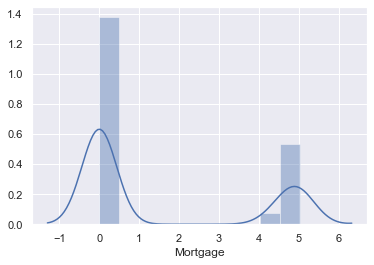

In [29]:
cust_df["Mortgage"]= np.log1p(cust_df["Mortgage"])
sns.distplot(cust_df["Mortgage"])
plt.show()

### Standardising numerical features

In [30]:
#Standardise the numerical columns
scalar = StandardScaler()
cust_df["Experience"]=scalar.fit_transform(cust_df[["Experience"]])
cust_df["Income"]=scalar.fit_transform(cust_df[["Income"]])
cust_df["CCAvg"]=scalar.fit_transform(cust_df[["CCAvg"]])
cust_df["Mortgage"]=scalar.fit_transform(cust_df[["Mortgage"]])

<span style="font-family: Arial; font-weight:bold;font-size:2.5em;color:#0e92ea">Model Buidling

### Spliting the Data

We will use 70% data for training and 30% of the data for testing.

In [31]:
X = cust_df.drop(['Personal Loan'],axis=1)     # Predictor feature columns 
Y = Target   # Predicted class (1, 0) 

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)
# 1 is just any random seed number

x_train.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
1334,1335,47.0,0.148536,-0.919844,94304,2,-0.365061,1,-0.665573,0,0,1,0
4768,4769,38.0,-0.562456,-0.811719,93118,1,0.035515,2,-0.665573,0,0,1,0
65,66,59.0,1.303898,1.580547,91360,1,1.065567,1,-0.665573,0,0,1,1
177,178,29.0,-1.540070,-0.108906,94132,4,-0.078935,2,1.571955,0,0,0,0
4489,4490,39.0,-0.651330,-1.298281,95518,3,-0.994537,2,-0.665573,0,0,1,0


Lets check the split of data

In [32]:
print("{0:0.2f}% data is in training set".format((len(x_train)/len(cust_df.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(x_test)/len(Target.index)) * 100))

70.00% data is in training set
30.00% data is in test set


Now lets check customers who bought personal loan and who didn't buy personal loan

In [33]:
print("Original Personal Loan Values of customer who bought : {0} ({1:2.2f}%)".format(n_true, (n_true / (n_true + n_false)) * 100 ))
print("Original Personal Loan Values of customer who didn't buy  : {0} ({1:2.2f}%)".format(n_false, (n_false / (n_true + n_false)) * 100))
print("")
print("Training Personal Loan Values of customer who bought    : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train)) * 100))
print("Training Personal Loan Values of customer who didn't buy   : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train)) * 100))
print("")
print("Test Personal Loan Values of customer who bought        : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test)) * 100))
print("Test Personal Loan Values of customer who didn't buy       : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test)) * 100))
print("")

Original Personal Loan Values of customer who bought : 480 (9.60%)
Original Personal Loan Values of customer who didn't buy  : 4520 (90.40%)

Training Personal Loan Values of customer who bought    : 331 (9.46%)
Training Personal Loan Values of customer who didn't buy   : 3169 (90.54%)

Test Personal Loan Values of customer who bought        : 149 (9.93%)
Test Personal Loan Values of customer who didn't buy       : 1351 (90.07%)



### Logistic Regression

In [34]:
def logistReg(x_train,y_train,solver="liblinear"):
    # Fit the model on train
    model = LogisticRegression(solver=solver)
    model.fit(x_train, y_train)
    #predict on test
    y_predict = model.predict(x_test)
    y_predictprob = model.predict_proba(x_test)

    coef_df = pd.DataFrame(model.coef_,columns=list(x_train.columns))
    coef_df['intercept'] = model.intercept_
    model_score = model.score(x_train, y_train)
    print(f"Accuracy of Training Data: {model_score}")
    model_score = model.score(x_test, y_test)
    print(f"Accuracy of Test Data: {model_score}")
    print(coef_df)
    print(metrics.classification_report(y_test,y_predict))
    cm=metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])

    df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                      columns = [i for i in ["Predict 1","Predict 0"]])
    plt.figure(figsize = (8,5))
    sns.heatmap(df_cm, annot=True)
    plt.show()
    print("f1 score", metrics.f1_score(y_test,y_predict))
    print("Auc Roc Score: ",metrics.roc_auc_score(y_test,y_predict))
    return y_predictprob,y_predict

Accuracy of Training Data: 0.9054285714285715
Accuracy of Test Data: 0.9006666666666666
         ID           Age    Experience    Income  ZIP Code        Family  \
0 -0.000046 -7.200925e-07 -7.398050e-08  0.000001 -0.000023  1.822384e-07   

          CCAvg     Education      Mortgage  Securities Account    CD Account  \
0  9.103178e-07  2.507725e-07  7.552978e-08        1.231215e-08  1.890801e-07   

         Online    CreditCard     intercept  
0  1.815187e-08  7.676983e-09 -1.429326e-09  
              precision    recall  f1-score   support

           0       0.90      1.00      0.95      1351
           1       0.00      0.00      0.00       149

    accuracy                           0.90      1500
   macro avg       0.45      0.50      0.47      1500
weighted avg       0.81      0.90      0.85      1500



/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


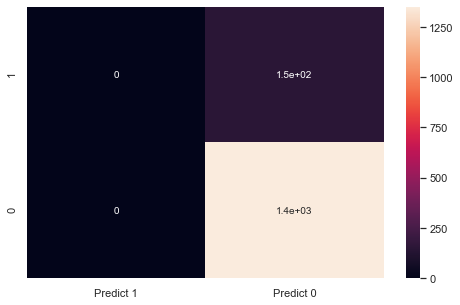

f1 score 0.0
Auc Roc Score:  0.5


In [35]:
y_predProb,y_pred = logistReg(x_train,y_train)

#### Lets improve the model based on the removal of variables which are not mostly contributing and also removing multicolinear variables

In [36]:
X = cust_df.drop(["Personal Loan","Age","ZIP Code","CreditCard","ID","Online"],axis=1)     # Predictor feature columns 
Y = Target   # Predicted class (1, 0) 

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=46)
# 1 is just any random seed number

x_train.head()

,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account
456,1.659394,-0.730625,3,-0.822862,2,1.454011,0,0
4480,0.859528,1.580547,2,2.324520,3,-0.665573,0,0
3564,-1.184574,-1.082031,1,-0.765637,3,-0.665573,0,0
587,0.326284,0.675000,1,1.695044,1,1.571955,0,0
2634,-1.006826,0.161406,1,0.493316,1,1.571955,0,0


Accuracy of Training Data: 0.9545714285714286
Accuracy of Test Data: 0.9633333333333334
   Experience   Income    Family    CCAvg  Education  Mortgage  \
0    0.018167  3.06877  0.500234  0.25035   1.350572  0.095718   

   Securities Account  CD Account  intercept  
0           -0.546275    2.193506   -8.86305  
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1349
           1       0.93      0.69      0.79       151

    accuracy                           0.96      1500
   macro avg       0.95      0.84      0.89      1500
weighted avg       0.96      0.96      0.96      1500



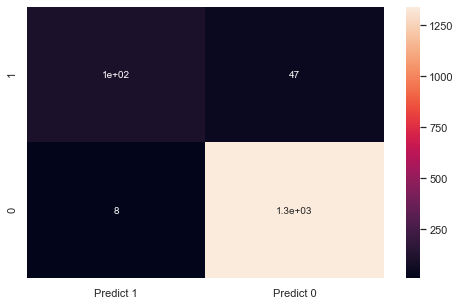

f1 score 0.7908745247148289
Auc Roc Score:  0.8414057015498358


In [37]:
y_predpob,y_pred=logistReg(x_train,y_train)

Accuracies are good for both train and test data but we don't consider accuracy as main metric in classification because ACCURACY = (TP+TN)/(TP+TN+FP+FN).

If the model predicts all the data points as positive then accuracy score is 100% but it is not a proper model.

By predicting everything as positive which are actually positive could lead to many problems. Accuracy is not a recommended metric here.

f1-score is hormonic mean of precision and recall which can be considered to improve the model.

So lets improve the f1score = 2*((precision*recall)/(precision+recall)) 

#### As we already aware the target column is not symmetrical distributed lets upsample it

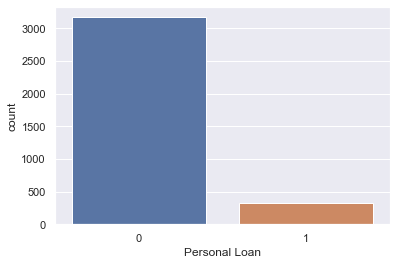

In [38]:
sns.countplot(y_train)
plt.show()

In [39]:
y_train.value_counts()

0    3171
1     329
Name: Personal Loan, dtype: int64

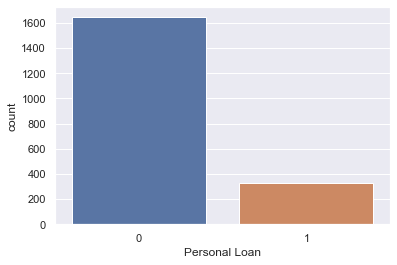

Accuracy of Training Data: 0.9437689969604863
Accuracy of Test Data: 0.9666666666666667
   Experience    Income    Family     CCAvg  Education  Mortgage  \
0   -0.042947  2.854533  0.465098  0.297206   1.249082  0.115052   

   Securities Account  CD Account  intercept  
0           -0.776898    2.293812  -7.769803  
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1349
           1       0.88      0.77      0.82       151

    accuracy                           0.97      1500
   macro avg       0.93      0.88      0.90      1500
weighted avg       0.97      0.97      0.97      1500



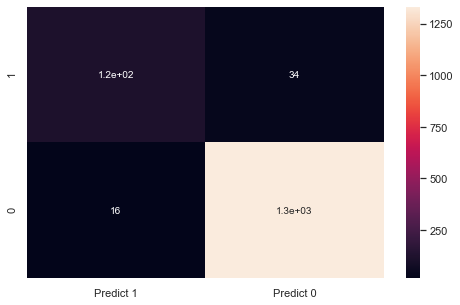

f1 score 0.823943661971831
Auc Roc Score:  0.8814868997884132


In [40]:
#Undersampling the majority
xtrain_resampled, ytrain_resampled = RandomUnderSampler(sampling_strategy=0.2,random_state=46).fit_resample(x_train,y_train)
sns.countplot(ytrain_resampled)
plt.show()
y_predProb,y_predict = logistReg(xtrain_resampled,ytrain_resampled)

In [41]:
fprLR, tprLR, threshLR = metrics.roc_curve(y_test, y_predProb[:,1], pos_label=1)

- Logistic regression results for the Upsampled data is not prominent so undersampled the majoirty class 

### K-NN Classification Model

In [42]:
scores =[]
#OverSampling the minority to get the better results
xtrain_resampled, ytrain_resampled = SMOTE(sampling_strategy=1,random_state=46).fit_resample(x_train,y_train)
for k in range(1,50):
    NNH = KNeighborsClassifier(n_neighbors = k, weights = 'distance', metric='euclidean' )
    NNH.fit(xtrain_resampled, ytrain_resampled)
    scores.append(NNH.score(x_test, y_test))

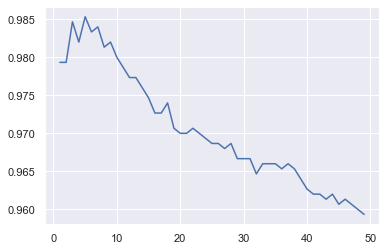

In [43]:
plt.plot(range(1,50),scores)
plt.show()

##### Above plot gives us the best k value to choose based on the score

In [44]:
NNH = KNeighborsClassifier(n_neighbors= 5 , weights = 'distance', metric='euclidean' )
NNH.fit(xtrain_resampled, ytrain_resampled)
y_predKnn = NNH.predict(x_test)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1349
           1       0.91      0.95      0.93       151

    accuracy                           0.99      1500
   macro avg       0.95      0.97      0.96      1500
weighted avg       0.99      0.99      0.99      1500



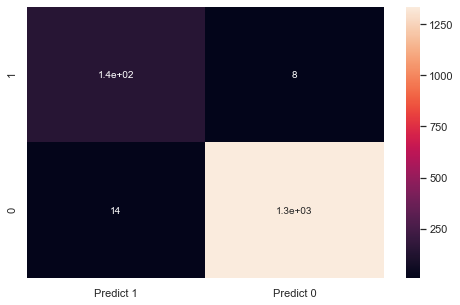

Score of Knn Test Data : 0.9853333333333333
Score of Knn Train Data : 1.0
Roc AUC score of KNN : 0.9683209048645305
f1 score of KNN : 0.9285714285714285



In [45]:
print(metrics.classification_report(y_test,y_predKnn))
cm=metrics.confusion_matrix(y_test, y_predKnn, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (8,5))
sns.heatmap(df_cm, annot=True)
plt.show()
print(f'Score of Knn Test Data : {NNH.score(x_test,y_test)}')
print(f'Score of Knn Train Data : {NNH.score(xtrain_resampled,ytrain_resampled)}')
print(f"Roc AUC score of KNN : {metrics.roc_auc_score(y_test,y_predKnn)}")
print(f"f1 score of KNN : {metrics.f1_score(y_test,y_predKnn)}\n")

8 Customers who actually bought personal loan but missclassified as non liable customer to purchase personal loan

14 Customers who are not interested in personal loan but missclassified as liable customer to purchase PL.

The ROC_AUC Score States that the above model is able to distingush postives and negatives with 96.8%

In [46]:
pred_prob_NNH = NNH.predict_proba(x_test)
fprNNH, tprNNH, threshNNH = metrics.roc_curve(y_test, pred_prob_NNH[:,1], pos_label=1)

### Naive Bayes

In [47]:
NBmodel = GaussianNB()
NBmodel.fit(xtrain_resampled,ytrain_resampled)
y_NBPred = NBmodel.predict(x_test)

              precision    recall  f1-score   support

           0       0.99      0.87      0.93      1349
           1       0.44      0.94      0.60       151

    accuracy                           0.87      1500
   macro avg       0.72      0.90      0.76      1500
weighted avg       0.94      0.87      0.89      1500



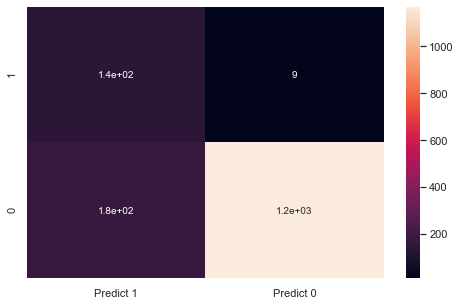

Score of NB Test Data : 0.874
Score of NB Train Data : 0.8886786502680543
Roc AUC score of NB : 0.9034825895070667
f1 score of NB : 0.6004228329809725



In [48]:
print(metrics.classification_report(y_test,y_NBPred))
cm=metrics.confusion_matrix(y_test, y_NBPred, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (8,5))
sns.heatmap(df_cm, annot=True)
plt.show()
print(f'Score of NB Test Data : {NBmodel.score(x_test,y_test)}')
print(f'Score of NB Train Data : {NBmodel.score(xtrain_resampled,ytrain_resampled)}')
print(f"Roc AUC score of NB : {metrics.roc_auc_score(y_test,y_NBPred)}")
print(f"f1 score of NB : {metrics.f1_score(y_test,y_NBPred)}\n")

In [49]:
pred_prob_NB = NBmodel.predict_proba(x_test)
fprNB, tprNB, threshNB = metrics.roc_curve(y_test, pred_prob_NB[:,1], pos_label=1)

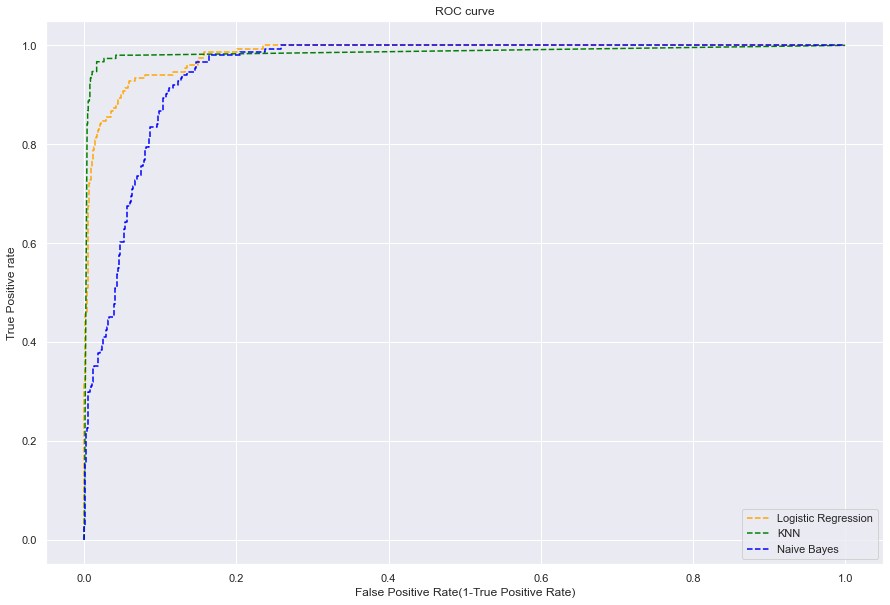

In [50]:
# plot roc curves
plt.figure(figsize=(15,10))
plt.plot(fprLR, tprLR, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fprNNH, tprNNH, linestyle='--',color='green', label='KNN')
plt.plot(fprNB, tprNB, linestyle='--', color='blue', label='Naive Bayes')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate(1-True Positive Rate)')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.show();

It is evident from the plot that the AUC for the KNN ROC curve is higher than that for the Logistic Regression and Naive Bayes ROC curve. 

Therefore, we can say that KNN did a better job of classifying the positive class in the dataset.

### END